In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [279]:
import pandas as pd

In [280]:
df1 = pd.read_csv("sent_emails.csv")

In [281]:
df2 = pd.read_csv("responded.csv")

In [282]:
df3 = pd.read_csv("userbase.csv")

In [283]:
df1

,Sent_Date,Customer_ID,SubjectLine_ID
0,2016-01-28,1413,2
1,2016-03-02,83889,2
2,2016-03-09,457832,3
3,2016-01-20,127772,1
4,2016-02-03,192123,3
...,...,...,...
2476349,2016-02-22,460565,3
2476350,2016-02-25,360823,2
2476351,2016-03-02,443177,2
2476352,2016-03-12,179200,3


In [284]:
df2

,Responded_Date,Customer_ID,SubjectLine_ID
0,2016-01-25,217102,3
1,2016-03-26,366875,2
2,2016-03-17,201561,2
3,2016-01-11,395345,3
4,2016-01-11,427539,3
...,...,...,...
378203,2016-01-09,43156,1
378204,2016-03-16,397330,2
378205,2016-02-25,377520,1
378206,2016-02-04,146008,2


In [291]:
df2.sort_values(by='Customer_ID')

,Responded_Date,Customer_ID,SubjectLine_ID
338600,2016-02-28,1,1
365374,2016-01-24,1,2
243228,2016-01-31,3,1
190004,2016-01-26,5,3
322067,2016-01-11,6,3
...,...,...,...
126695,2016-03-07,499997,3
114456,2016-02-15,499997,1
109120,2016-02-29,499998,2
232712,2016-03-25,500000,2


In [285]:
df3

,Customer_ID,Gender,Type,Email_Address,Age,Tenure
0,1,M,C,Mph@msn.com,38,12
1,2,F,B,SophcYN7381qMe8lRqK@aol.com,37,23
2,3,F,C,xE@msn.com,32,15
3,4,M,C,WduR0o0@comcast.net,31,24
4,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13
...,...,...,...,...,...,...
499995,499996,M,B,iMt8ckJsdR@msn.com,25,12
499996,499997,F,C,z58KHLR7VtjRZYZh@gmail.com,30,9
499997,499998,M,B,PGqUn8eT9A4lz7geMZ@comcast.net,30,11
499998,499999,M,C,QkI8AH@hotmail.com,33,11


In [286]:
merged_df = df1.merge(df2, on='Customer_ID').merge(df3, on='Customer_ID')

In [287]:
merged_df['one_day_response']= merged_df.apply(lambda row: 1 if row['Sent_Date'] == row['Responded_Date'] else 0, axis=1)

In [288]:
merged_df["one_day_response"].value_counts()

one_day_response
0    2002147
1     243175
Name: count, dtype: int64

In [290]:
merged_df["Responded_Date"].value_counts()

Responded_Date
2016-01-27    26724
2016-01-16    26692
2016-02-17    26582
2016-03-12    26470
2016-03-08    26423
              ...  
2016-03-30     2819
2016-03-31     1028
2016-04-01      381
2016-04-02       40
2016-04-03       11
Name: count, Length: 94, dtype: int64

In [26]:
# I need a function that will take in a sent_date and received date and return 1 if the email was responded to on the same day, 0 otherwise
def one_day_response(row):
    if row['Sent_Date'] == row['Responded_Date']:
        return 1
    else:
        return 0

In [31]:
df['one_day_response'] = df.apply(one_day_response, axis=1)

In [3]:
from data_pipeline import ETL_Pipeline

In [4]:
etl = ETL_Pipeline()

In [5]:
etl.extract()

In [6]:
etl.data

,Sent_Date,Customer_ID,SubjectLine_ID,Responded_Date,Gender,Type,Email_Address,Age,Tenure
0,2016-01-28,1413,2,2016-01-31,M,B,Jaj2NuUJneD@gmail.com,44,12
1,2016-01-03,1413,2,2016-01-31,M,B,Jaj2NuUJneD@gmail.com,44,12
2,2016-02-03,192123,3,2016-02-04,M,C,Qtgy0C@msn.com,33,9
3,2016-03-22,192123,3,2016-02-04,M,C,Qtgy0C@msn.com,33,9
4,2016-02-07,399506,2,2016-03-24,M,C,JQVjAP2eVCnIz@hotmail.com,26,21
...,...,...,...,...,...,...,...,...,...
996447,2016-02-24,199997,3,2016-02-24,F,C,FTS1fGSti8VbILJQibW@yahoo.com,23,26
996448,2016-02-26,450147,3,2016-02-28,M,B,oO9hwPY@yahoo.com,52,16
996449,2016-03-19,290272,3,2016-03-20,M,C,d@yahoo.com,23,12
996450,2016-02-28,287907,3,2016-03-03,M,C,DY@hotmail.com,20,22


In [7]:
etl.transform()

In [8]:
etl.load()

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("transformed_data.csv", index_col=0, low_memory=False)

In [11]:
df

,SubjectLine_ID,Gender,Type,Email_Address,Age,Tenure,one_day_response
0,2,M,B,Jaj2NuUJneD@gmail.com,44,12,0
1,2,M,B,Jaj2NuUJneD@gmail.com,44,12,0
2,3,M,C,Qtgy0C@msn.com,33,9,0
3,3,M,C,Qtgy0C@msn.com,33,9,0
4,2,M,C,JQVjAP2eVCnIz@hotmail.com,26,21,0
...,...,...,...,...,...,...,...
996447,3,F,C,FTS1fGSti8VbILJQibW@yahoo.com,23,26,1
996448,3,M,B,oO9hwPY@yahoo.com,52,16,0
996449,3,M,C,d@yahoo.com,23,12,0
996450,3,M,C,DY@hotmail.com,20,22,0


In [12]:
df["one_day_response"].value_counts()

one_day_response
0    767342
1    229110
Name: count, dtype: int64

In [14]:
!pip install gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 4.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827634 sha256=52790194b8a1a391dd0fa2eb9084781e4ad52c0546df569587a6781a48c2d9b9
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym


In [15]:
import gym

class MyEnv(gym.Env):
    def __init__(self):
        self.state = None

    def reset(self):
        # Initialize the state using the given features
        self.state = (1, 'M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12)
        return self.state

# Create an instance of the environment
my_env = MyEnv()

# Reset the environment to get the initial state
state = my_env.reset()
print("Initial state:", state)

Initial state: (1, 'M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12)


In [94]:
import numpy as np

class MyEnv:
    def __init__(self, data):
        self.data = data
        self.current_row = 0
        self.Q = np.zeros([len(data), 4, 2]) # Initialize a Q-table with dimensions: [number of rows, number of actions, number of possible next states]

    def reset(self):
        self.current_row = 0
        self.state = self.get_state()
        return self.state

    def get_state(self):
        return [self.data[self.current_row, 1], self.data[self.current_row, 2], self.data[self.current_row, 3]]

    def get_possible_actions(self):
        return [1, 2, 3]

    def get_reward(self, action):
        next_row = self.current_row + 1
        if next_row >= len(self.data):
            next_row = 0
        next_state = self.get_state()
        reward = self.data[self.current_row, 6]
        self.current_row = next_row
        return reward, next_state

    def update_Q(self, state, action, reward, next_state):
        alpha = 0.1 # Learning rate
        gamma = 0.9 # Discount factor
        if self.current_row < len(self.data) - 1:
            max_future_Q = np.max([np.max(self.Q[self.current_row + 1, a, :]) for a in range(3)])
            self.Q[self.current_row, action, :] = self.Q[self.current_row, action, :] + alpha * (reward + gamma * max_future_Q - self.Q[self.current_row, action, :])

    def get_action(self, state):
        possible_actions = self.get_possible_actions()
        Q_values = [self.Q[self.current_row, a, :] for a in possible_actions]
        max_Q_values = np.max([np.max(q) for q in Q_values])
        max_Q_indices = [i for i, q in enumerate(Q_values) if np.any(q == max_Q_values)]
        action = np.random.choice(max_Q_indices)
        return possible_actions[action]

    def train(self):
        for i in range(1000): # Train for 1000 episodes
            state = self.reset()
            done = False
            while not done:
                action = self.get_action(state)
                reward, next_state = self.get_reward(action)
                self.update_Q(state, action, reward, next_state)
                state = next_state
                done = self.is_done()

    def is_done(self):
        return self.current_row >= len(self.data)

In [101]:
env = MyEnv(df.values)

In [102]:
env.reset()

['M', 'B', 'Jaj2NuUJneD@gmail.com']

In [103]:
env.data[0, 1]

'M'

In [99]:
env.train()

KeyboardInterrupt: 

In [58]:
env.get_possible_actions()

[1, 2, 3]

In [33]:
test = df.to_numpy()

In [34]:
test[0, 1]

'M'

In [134]:
import gym

class CustomEnv(gym.Env):
    def __init__(self, data):
        self.data = data
        self.current_state_index = 0

    # Other methods will be defined here
    def reset(self):
        self.current_state_index = 0
        return self.data[self.current_state_index][1:]  # Exclude the SubjectLine_ID
    
    def action_space(self):
        return gym.spaces.Discrete(len(self.data))
    
    def reward(self, action):
        next_state_index = self.current_state_index + 1
        if next_state_index >= len(self.data):
            return 0  # Terminal state

        if self.data[next_state_index][-1] == 1:
            return 1
        else:
            return -1
    
    def step(self, action):
        assert self.action_space().contains(action), f"Action {action} not in the action space"

        prev_state = self.data[self.current_state_index][1:]
        self.current_state_index += 1

        if self.current_state_index >= len(self.data):
            next_state = None
            done = True
            reward = 0
        else:
            next_state = self.data[self.current_state_index][1:]
            reward = self.reward(action)
            done = False

        return next_state, reward, done, {}

In [135]:
env2 = CustomEnv(df.values)

In [136]:
env2.reset()

array(['M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12, 0], dtype=object)

In [137]:
env2.step(1)

(array(['M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12, 0], dtype=object),
 -1,
 False,
 {})

In [116]:
env2.step(3)

(array(['M', 'B', 'u9QH2o@aol.com', 36, 8, 0], dtype=object), -1, False, {})

In [292]:
import gym
import numpy as np

# Import the spaces module from the gym library
from gym.spaces import Discrete

class CustomEnv(gym.Env):
    def __init__(self, data):
        self.data = data
        self.current_state_index = 0
        #self.action_space = Discrete(len(self.data))

    def reset(self):
        self.current_state_index = 0
        return self.data[self.current_state_index][1:]  # Exclude the SubjectLine_ID

    def step(self, action):
        assert self.action_space(), f"Action {action} not in the action space"

        prev_state = self.data[self.current_state_index][1:]
        self.current_state_index += 1

        if self.current_state_index >= len(self.data):
            next_state = None
            done = True
            reward = 0
        else:
            next_state = self.data[self.current_state_index][1:]
            reward = self.reward(action)
            done = False

        return next_state, reward, done, {}
    
    def action_space(self):
        return [1, 2, 3]

    def reward(self, action):
        next_state_index = self.current_state_index + 1
        if next_state_index >= len(self.data):
            return 0  # Terminal state

        if self.data[self.current_state_index][-1] == 1:
            return 10
        elif self.data[self.current_state_index][1] == action:
            return 1
        else:
            return -10

In [293]:
import numpy as np
import random

class QLearningAgent:
    def __init__(self, env, alpha=0.5, epsilon=0.5, gamma=0.5):
        self.env = env
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.q_table = {}

    def get_q_value(self, state, action):
        state_action_key = (tuple(state), action)
        if state_action_key not in self.q_table:
            return -1.0
        return self.q_table[state_action_key]

    def set_q_value(self, state, action, value):
        state_action_key = (tuple(state), action)
        self.q_table[state_action_key] = value

    def choose_action(self, state):
        if random.random() < self.epsilon:
            # Explore by choosing a random action
            available_actions = self.env.action_space()
            return random.choice(available_actions)
        else:
            # Exploit by choosing the action with the highest Q-value
            q_values = [self.get_q_value(state, a) for a in self.env.action_space()]
            max_q_value = max(q_values)
            available_actions = [a for a in self.env.action_space() if self.get_q_value(state, a) == max_q_value]
            return random.choice(available_actions)

    def learn(self, num_episodes=1):
        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done, _ = self.env.step(action)
                q_value = self.get_q_value(state, action)
                next_q_value = 0.0 if done else max([self.get_q_value(next_state, a) for a in range(len(self.env.data))])
                self.set_q_value(state, action, q_value + self.alpha * (reward + self.gamma * next_q_value - q_value))
                state = next_state

    def play(self, num_episodes=10):
        """
        Plays the agent for a specified number of episodes and returns statistics about its performance.
    
        Args:
            num_episodes (int): The number of episodes to play.
    
        Returns:
            dict: A dictionary containing statistics about the agent's performance.
        """
        statistics = {
            "total_reward": 0.0,
            "average_reward": 0.0,
            "max_reward": float('-inf'),
            "min_reward": float('inf'),
            "num_episodes": num_episodes
        }
    
        for i in range(num_episodes):
            state = self.env.reset()
            done = False
            episode_reward = 0.0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_reward += reward
                state = next_state
            statistics["total_reward"] += episode_reward
            statistics["average_reward"] = statistics["total_reward"] / (i + 1)
            if episode_reward > statistics["max_reward"]:
                statistics["max_reward"] = episode_reward
            if episode_reward < statistics["min_reward"]:
                statistics["min_reward"] = episode_reward
    
        return statistics

Hey Dummy, the environment and state of the action are not matching up, so it always returns maximum negative value. Fix that

To fix the environment we will need to use pandas query and is in to find the information based off of the userbase and email data to apply t he userbase data to the email data, and then to look for data in the response data to see if the email was responded to in the same day or at all.

Change the data to add userbase info to the email data, then add another create column to add if a user responded or nto, then an additional column after that to determine if the response was in the same day or not.

Then we can use the Q learning agent to determine the best action to take based off of the data.

In [1]:
from model import QLearningAgent


In [2]:
from environment import EmailEnvironment

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("transformed_data.csv", index_col=0, low_memory=False)

In [5]:
new_df = df.head(1000)

In [6]:
# Create the environment
data = new_df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
agent.learn(num_episodes=1)

# Play the agent
stats = agent.play()

In [7]:
agent.q_table

{(('M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12, 0), 3): -8.125,
 (('M', 'C', 'Qtgy0C@msn.com', 33, 9, 0), 3): -5.75,
 (('M', 'C', 'Qtgy0C@msn.com', 33, 9, 0), 2): -5.75,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 0), 1): -5.75,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 0), 3): -3.125,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 1), 3): -1.8125,
 (('F', 'B', 'CZjbmV6IsyfOb@yahoo.com', 34, 15, 0), 3): 4.25,
 (('F', 'B', 'CZjbmV6IsyfOb@yahoo.com', 34, 15, 1), 2): -5.75,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 0), 2): 1.34375,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 0), 1): -6.15625,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 1), 2): -4.4375,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 1), 3): -5.75,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 0), 2): -5.75,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 0), 1): -5.75,
 (('M', 'C', '8EH@gmail.com', 30, 14, 0), 1): -8.328125,
 (('M', 'C', '8EH@gmail.com', 30, 14, 1), 1): -4.4375,
 (('M', 'C', '8EH@gmail.com

In [8]:
agent.learn(num_episodes=100)

In [9]:
agent.q_table

{(('M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12, 0), 3): -10.5,
 (('M', 'C', 'Qtgy0C@msn.com', 33, 9, 0), 3): -9.337745831329448,
 (('M', 'C', 'Qtgy0C@msn.com', 33, 9, 0), 2): -9.17752489153131,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 0), 1): -3.6429260329292292,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 0), 3): -3.6577746344353437,
 (('M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 1), 3): 3.7899633319482016,
 (('F', 'B', 'CZjbmV6IsyfOb@yahoo.com', 34, 15, 0), 3): 9.499679565429688,
 (('F', 'B', 'CZjbmV6IsyfOb@yahoo.com', 34, 15, 1), 2): -9.60521799808389,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 0), 2): 3.3181369154659714,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 0), 1): -9.043397307724312,
 (('M', 'B', 'u9QH2o@aol.com', 36, 8, 1), 2): -8.417515624855932,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 1),
  3): -10.499999999447027,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 0), 2): -9.42826901842761,
 (('M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 0),
  1

In [9]:
stats

{'total_reward': -60200.0,
 'average_reward': -6020.0,
 'max_reward': -6020.0,
 'min_reward': -6020.0,
 'num_episodes': 10}

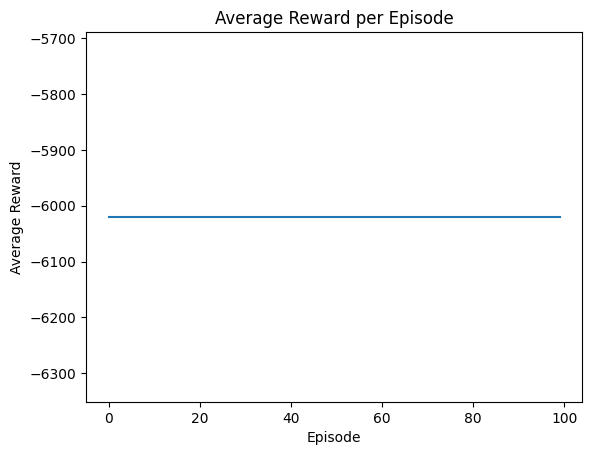

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(100):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()